# **EMAIL SPAM DETECTION WITH MACHINE LEARNING**

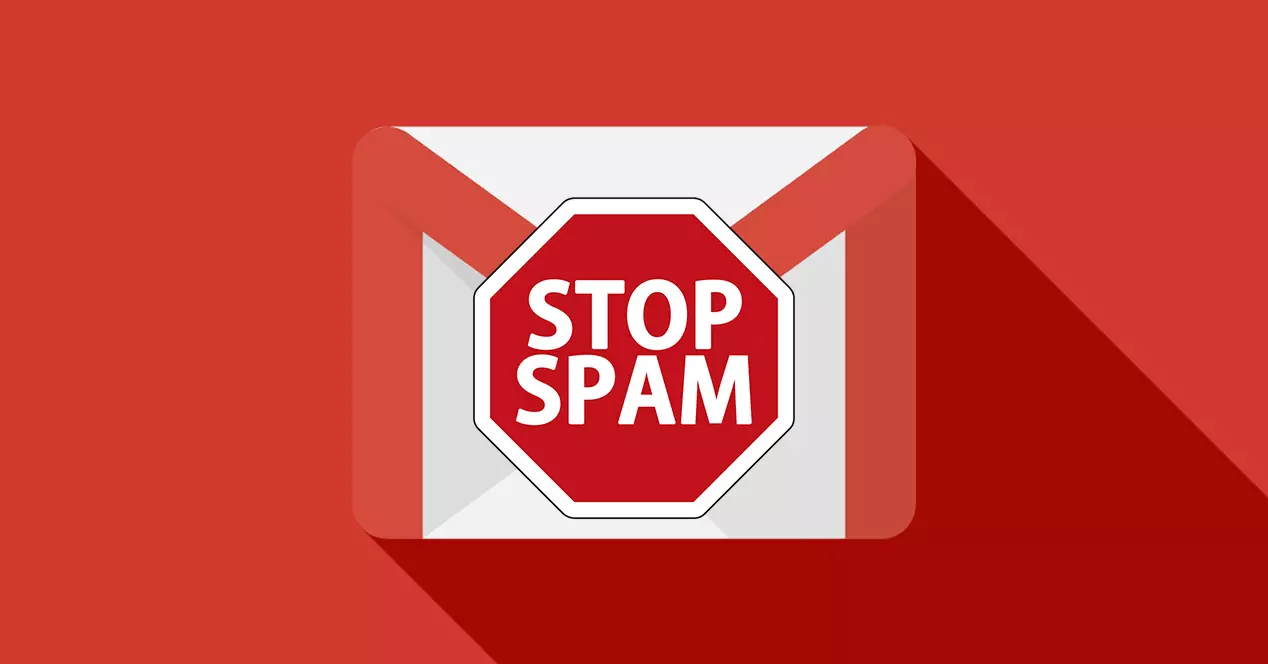



#Download **Dataset** here [EMAIL SPAM DETECTION](https://drive.google.com/file/d/19Yz5vBQ3T174xeSOOqVzw3rWWm39stsf/view?usp=share_link)

### Knowing about the Dataset

**Importing the Required Libraries**

In [2]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# Pickle Library for Saving the Model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Reading informations in the Dataset**

In [3]:
spam = pd.read_csv("/content/spam.csv", encoding='latin-1')

**Checking for null values in Data**

In [4]:
spam.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


**Checking the First Five Values in the Data**

In [5]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Checking the Last Five Values in the Data**

In [6]:
spam.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


**Taking the required Columns in the Dataset**

In [7]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Dimensions of the Dataset**

In [8]:
spam.shape

(5572, 2)

**Checking for the classes in the Data**

In [9]:
spam.groupby('label').size()

,0
label,
ham,4825
spam,747


### Plotting

**Plotting the Label in the Dataset**

<Axes: xlabel='label'>

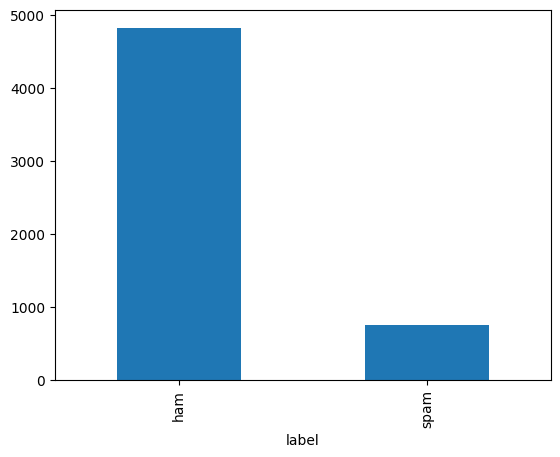

In [10]:
spam['label'].value_counts().plot(kind='bar')

In [11]:
spam[spam.duplicated()]

,label,message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [12]:
spam = spam.drop_duplicates()
spam

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
spam.groupby('label').size()

,0
label,
ham,4516
spam,653


### NLP

**Preprocessing the Text in the Dataset**

In [14]:
ps = PorterStemmer()
corpus = []
for i in spam.index: # Iterate through the index of the dataframe
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

**Creating Bag of Words Model**

In [15]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

### Data Modeling

**Splitting the Dataset into Training and Testing Set**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

### Model Building

**Creating the Models**

In [17]:
# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

**Prediction**

In [18]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

### Model Testing

**Testing the Model**

In [19]:
# Model 1 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")

# Model 3 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

Random Forest Classifier
Confusion Matrix: 
[[889   0]
 [ 25 120]]
Accuracy:  0.9758220502901354
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[872  17]
 [ 21 124]]
Accuracy:  0.9632495164410058
--------------------------------
Multinomial Naïve Bayes
Confusion Matrix: 
[[872  17]
 [  8 137]]
Accuracy:  0.9758220502901354


<Axes: >

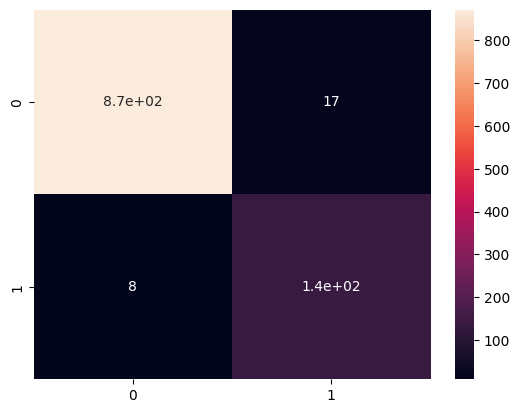

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)

import seaborn as sns
sns.heatmap(cm, annot=True)


In [21]:
from sklearn.metrics import classification_report

report1 = classification_report(Y_test, pred1)
print("Classification Report for RFC \n", report1)
report2 = classification_report(Y_test, pred2)
print("Classification Report for DTC \n", report2)
report3 = classification_report(Y_test, pred3)
print("Classification Report for MNB \n", report3)

Classification Report for RFC 
               precision    recall  f1-score   support

       False       0.97      1.00      0.99       889
        True       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.91      0.95      1034
weighted avg       0.98      0.98      0.97      1034

Classification Report for DTC 
               precision    recall  f1-score   support

       False       0.98      0.98      0.98       889
        True       0.88      0.86      0.87       145

    accuracy                           0.96      1034
   macro avg       0.93      0.92      0.92      1034
weighted avg       0.96      0.96      0.96      1034

Classification Report for MNB 
               precision    recall  f1-score   support

       False       0.99      0.98      0.99       889
        True       0.89      0.94      0.92       145

    accuracy                           0.98      1034
   macro avg       0.94      0.9

**Best Model is Multinomial Naïve Bayes**

### Saving Models

Saving all the Models

In [42]:
filename = "MNB.pkl"
pickle.dump(model3, open(filename, 'wb'))
print("Saved the Model")

Saved the Model


# Task
Create a Streamlit application in Colab that loads a saved machine learning model and vectorizer, takes an email message as input, and predicts whether the email is spam or not.

## Install streamlit

### Subtask:
Install the Streamlit library in your Colab environment.


**Reasoning**:
Install the streamlit library using pip.



In [24]:
!pip install streamlit

## Create a streamlit app file

### Subtask:
Create a new Python file that will contain the code for your Streamlit application.


**Reasoning**:
Create a new Python file named `app.py` and add the necessary Streamlit import.



## Write streamlit code

### Subtask:
Write the Python code for the Streamlit app, including loading the saved model and vectorizer, creating a text input for the email message, and displaying the prediction result.


**Reasoning**:
Write the Streamlit application code to load the model and vectorizer, create the UI elements for input and prediction, and display the result.



In [40]:
%%writefile app.py
import streamlit as st
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Load the saved model and vectorizer
# Make sure you have saved both files from your training script
try:
    with open('MNB.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    with open('vectorizer.pkl', 'rb') as vectorizer_file:
        cv = pickle.load(vectorizer_file)
except FileNotFoundError:
    st.error("Error: Model or vectorizer file not found. Please ensure 'MNB.pkl' and 'vectorizer.pkl' exist.")
    st.stop()


# Initialize the stemmer and stopwords
ps = PorterStemmer()
nltk.download('stopwords')
all_stopwords = stopwords.words('english')
all_stopwords.remove('not') # Keep 'not' for accurate sentiment analysis

# Function to preprocess the text
def preprocess_text(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    return review

# Set up the Streamlit app
st.set_page_config(page_title="Email Spam Detector", layout="centered")

st.markdown(
    """
    <style>
    .main-header {
        font-size: 3rem;
        font-weight: bold;
        text-align: center;
        color: #1a1a1a;
        margin-bottom: 0.5em;
    }
    .st-emotion-cache-1g813z1 {
        padding: 1rem;
        background-color: #f0f2f6;
        border-radius: 12px;
        border: 2px solid #e0e0e0;
    }
    .stButton>button {
        background-color: #4CAF50;
        color: white;
        font-size: 1.25rem;
        font-weight: bold;
        border-radius: 8px;
        border: none;
        padding: 0.75rem 1.5rem;
        width: 100%;
        margin-top: 1rem;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
        transition: transform 0.2s, box-shadow 0.2s;
    }
    .stButton>button:hover {
        transform: translateY(-2px);
        box-shadow: 0 6px 8px rgba(0, 0, 0, 0.15);
    }
    .stSuccess {
        background-color: #d4edda;
        color: #155724;
        border: 1px solid #c3e6cb;
        padding: 1rem;
        border-radius: 8px;
        margin-top: 1.5rem;
        text-align: center;
        font-size: 1.2rem;
    }
    .stError {
        background-color: #f8d7da;
        color: #721c24;
        border: 1px solid #f5c6cb;
        padding: 1rem;
        border-radius: 8px;
        margin-top: 1.5rem;
        text-align: center;
        font-size: 1.2rem;
    }
    .stTextArea label {
        font-size: 1.25rem;
        font-weight: bold;
        color: #333;
    }
    </style>
    """,
    unsafe_allow_html=True
)


st.markdown('<h1 class="main-header">✉️ Email Spam Detector</h1>', unsafe_allow_html=True)
st.markdown("Enter an email message below to see if it's spam or not.", unsafe_allow_html=True)

# Create a text area for user input
input_mail = st.text_area("Enter the email message:", height=200, help="Paste the full email content here.")

# Add a button to trigger the prediction
if st.button("Predict"):
    if input_mail:
        # 1. Preprocess the input text
        preprocessed_text = preprocess_text(input_mail)

        # 2. Transform the preprocessed text using the loaded CountVectorizer
        input_data_features = cv.transform([preprocessed_text])

        # 3. Make a prediction
        prediction = model.predict(input_data_features)

        # 4. Display the prediction result
        st.subheader("Prediction Result:")
        if prediction[0] == 1:
            st.error("This is a SPAM Mail!")
        else:
            st.success("This is a HAM (Not Spam) Mail!")
    else:
        st.warning("Please enter some text to analyze.")

Overwriting app.py


In [51]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle

# --- 1. Load the Dataset ---
try:
    data = pd.read_csv('spam.csv', encoding='latin-1')
except FileNotFoundError:
    print("Error: The file 'spam.csv' was not found.")
    exit()

# --- 2. Preprocessing the Dataset ---
nltk.download('stopwords')
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['v2'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

# --- 3. Creating the Bag of Words model ---
cv = CountVectorizer(max_features=4000) # Ensure this matches the original max_features
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 0].values
y = pd.get_dummies(y)
y = y.iloc[:, 1].values

# --- 4. Splitting the Dataset into Training and Testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# --- 5. Training the Naive Bayes model on the Training set ---
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# --- 6. Predicting the Test set results ---
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# --- 7. Saving the model and vectorizer to disk ---
with open('MNB.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(cv, vectorizer_file)

print("\nTraining complete. Model and vectorizer saved as 'MNB.pkl' and 'vectorizer.pkl'.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Confusion Matrix:
[[941   8]
 [  7 159]]
Accuracy Score: 0.9865470852017937
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       949
        True       0.95      0.96      0.95       166

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115


Training complete. Model and vectorizer saved as 'MNB.pkl' and 'vectorizer.pkl'.


In [52]:
#Spam i/p: Congratulations! You've won a luxury vacation package worth $10,000! Click here to claim your prize now!
#Ham i/p: Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting. Please review it at your convenience
input_your_mail ="Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting. Please review it at your convenience"
input_data_features = cv.transform([input_your_mail])
prediction = model3.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail
